In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = r'Hotel Reservations Dataset/Hotel Reservations.csv'
data = pd.read_csv(path)

In [3]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


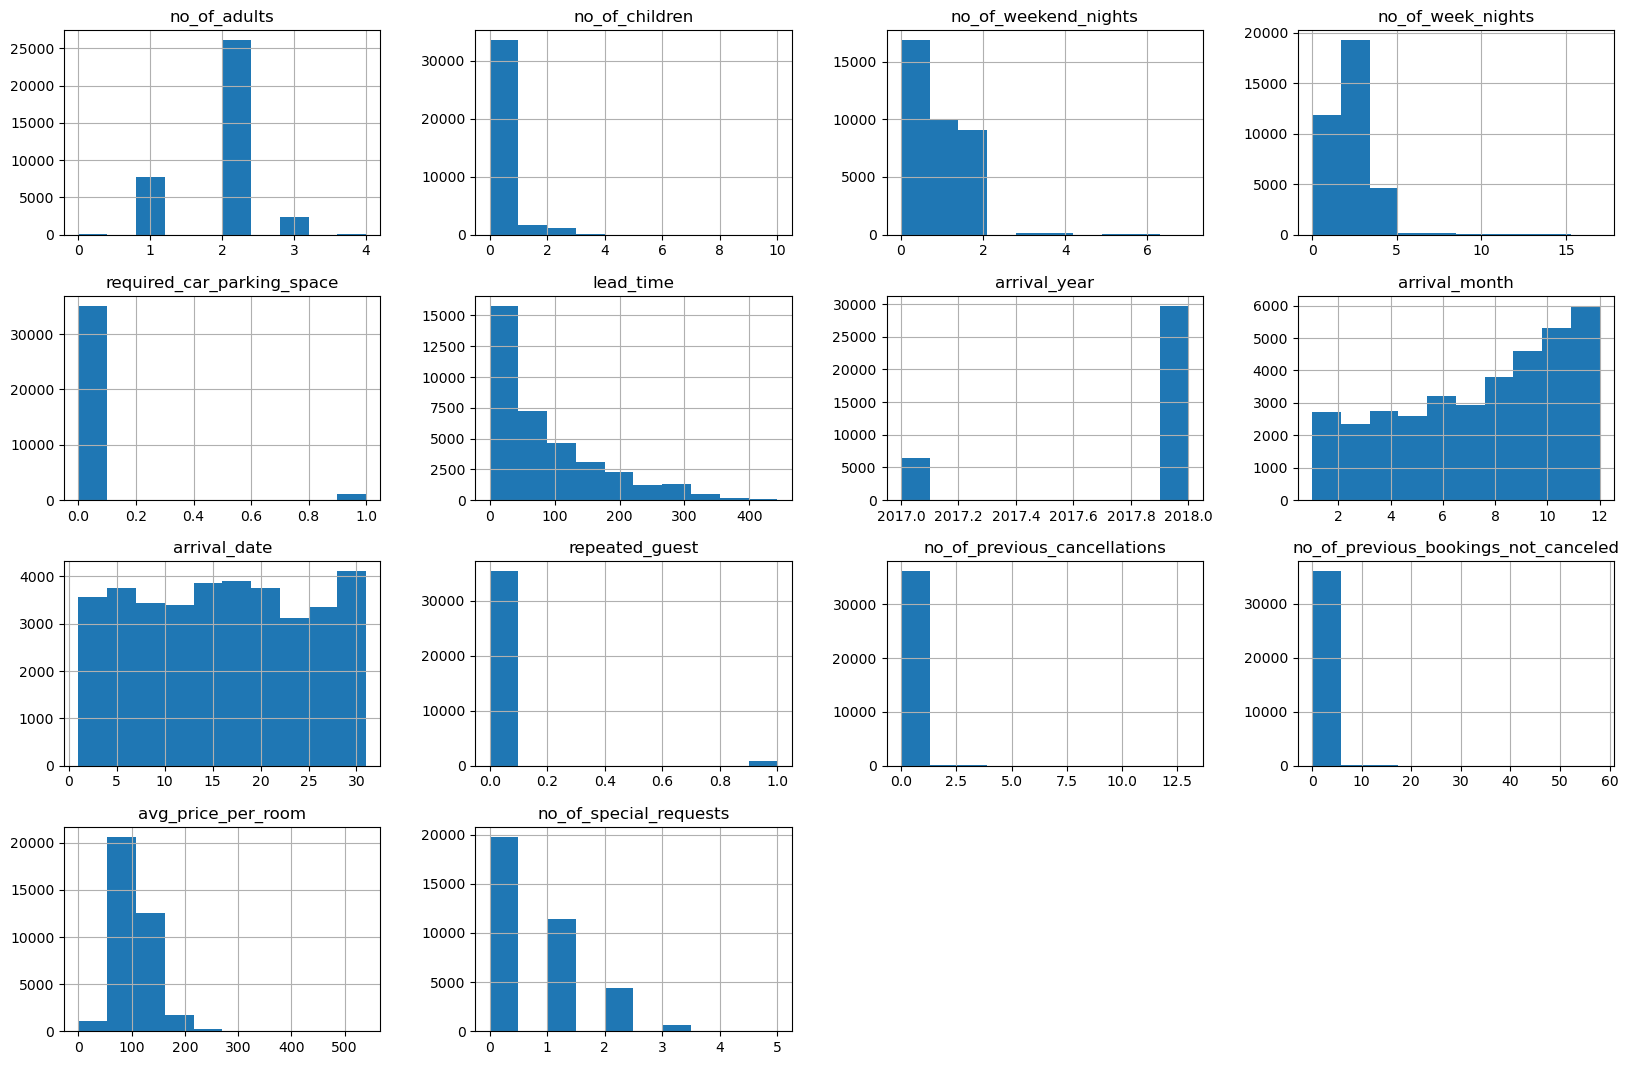

In [4]:
data.hist(figsize=(20, 13));

In [5]:
(data == 0).sum()

Booking_ID                                  0
no_of_adults                              139
no_of_children                          33577
no_of_weekend_nights                    16872
no_of_week_nights                        2387
type_of_meal_plan                           0
required_car_parking_space              35151
room_type_reserved                          0
lead_time                                1297
arrival_year                                0
arrival_month                               0
arrival_date                                0
market_segment_type                         0
repeated_guest                          35345
no_of_previous_cancellations            35937
no_of_previous_bookings_not_canceled    35463
avg_price_per_room                        545
no_of_special_requests                  19777
booking_status                              0
dtype: int64

In [6]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<Axes: xlabel='booking_status'>

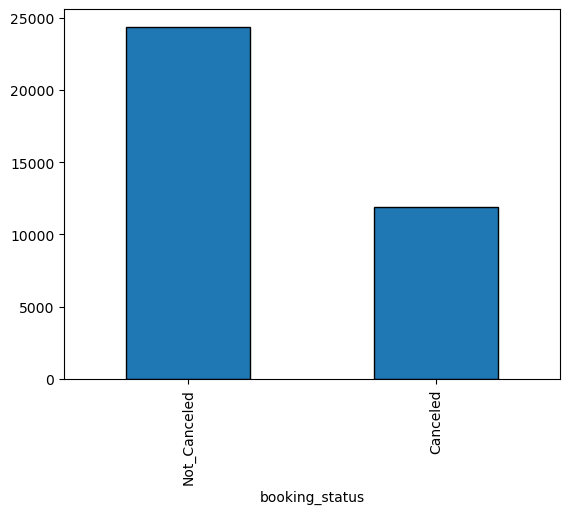

In [8]:
value_counts = data['booking_status'].value_counts()
value_counts.plot(kind='bar', edgecolor='black')

/home/amirhosein/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


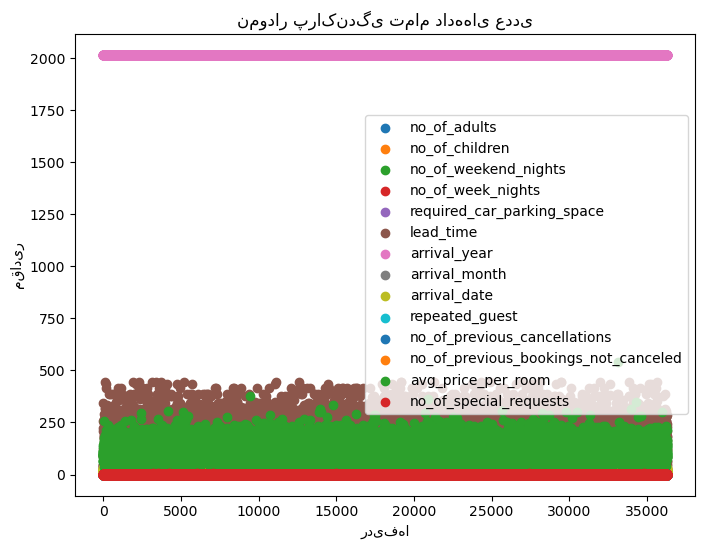

In [10]:
df = pd.DataFrame(data)

# رسم Scatter plot از تمام ستون‌های عددی در دیتافریم
plt.figure(figsize=(8, 6))
for column in df.columns:  # بررسی هر ستون در دیتافریم
    if pd.api.types.is_numeric_dtype(df[column]):  # بررسی اینکه آیا ستون عددی است یا نه
        plt.scatter(df.index, df[column], label=column)  # رسم Scatter plot برای هر ستون

# اضافه کردن برچسب‌ها و عنوان
plt.xlabel('ردیف‌ها')
plt.ylabel('مقادیر')
plt.title('نمودار پراکندگی تمام داده‌های عددی')

# اضافه کردن لیبل به هر ستون
plt.legend()

# نمایش نمودار
plt.show()
